# Physics 215: Chapter 3 (Errors and Uncertainties) Exercises

by: Juguilon, Vince Paul

2nd Semester, A.Y. 2024-2025

2025/02/01

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## A. Subtractive Cancellation Exercises

**(A1)** Remember back in high school when you learned that the quadratic equation

[3.8] $ax^2 + bx + c = 0$

has an analytic solution that can be written as either:

[3.9] $x_{1,2} = \frac{-b \pm \sqrt{b^2-4ac}}{2a}$ or $x_{1,2}' = \frac{-2c}{b\pm\sqrt{b^2-4ac}}$

Inspection of (3.9) indicates that subtractive cancelation (and consequently an increase in error) arises when $b^2 \gg 4ac$, as then the square root and its preceding term nearly cancel for one of the roots.

a) Write a program that calculates all solutions for arbitrary values of $a$, $b$, and $c$.

b) Investigate how errors in your computed answers become large as the subtractive cancelation increases, and relate this to the known machine precision. Hint: A good test case utilizes $a = 1$, $b = 1$, $c = 10^{−n}$, $n = 1, 2, 3, ...$.

In [2]:
import math

def quadratic_solutions(a, b, c):
    discriminant = b**2 - 4*a*c
    if discriminant < 0:
        return None  # Complex roots
    
    sqrt_discriminant = math.sqrt(discriminant)
    
    # Standard quadratic formula
    root1 = (-b + sqrt_discriminant) / (2 * a)
    root2 = (-b - sqrt_discriminant) / (2 * a)
    
    # Alternative quadratic formula
    alt_root1 = (-2 * c) / (b + sqrt_discriminant)  
    alt_root2 = (-2 * c) / (b - sqrt_discriminant) if abs(b - sqrt_discriminant) > 0.0001 else "inf"
    
    return root1, root2, alt_root1, alt_root2


The function above returns the solutions for the the two roots by calculating the analytic solutions using both the standard and alternative forms of the quadratic formula. 

As a test case, the roots were calculated below for the equation $x^2-4x-5=0$. Both forms returned the real roots $x=5$ and $x=-1$.

In [3]:
# Example usage with a = 1, b = -4, and c = -5 for (x+1)(x-5)
a = 1
b = -4
c = -5
roots = quadratic_solutions(a, b, c)
print("Roots:", roots)

Roots: (5.0, -1.0, 5.0, -1.0)


Next, we try to investigate the effects of subtractive cancellation using both forms. We do this by checking the condition $b^2 \gg 4ac$, since the square root and the preceeding term nearly cancels for one of the roots.

However, we also note that this condition will be an edge case for `alt_root2` of the `quadratic_solutions` functions, since this variable will approach `inf` as $b^2$ becomes much greater than $4ac$ in the denominator. Hence, we add a conditional statement in the function, and only compare the results of `root1` and `alt_root1` in the test case.

We calculate the absolute error between `root1` and '`alt_root1` (where `root1` has low precision due to the subtractive cancellation $-b + \sqrt{b^2 - 4ac}$ when $b^2 \gg 4ac$). The errors are calculated for $a=1$, $b=1$, $c=10^{-n}$ for values of $n=1,2,3,...$

In [4]:
def calculate_errors(a, b):
    ns = np.arange(1, 30)  # Values of n from 1 to 20
    errors1, errors2 = [], []
    
    for n in ns:
        c = 10.**(-n)
        roots = quadratic_solutions(a, b, c)
        
        if roots is None:
            continue  # Skip complex roots
        
        root1, root2, alt_root1, alt_root2 = roots
        # Calculate error (difference) between standard and alternative formula'
        error1_val = abs(root1 - alt_root1)
        errors1.append(error1_val)
    
    return ns, errors1

# Example usage: a = 1, b = 1
a = 1
b = 1
n_values, error_list_1 = calculate_errors(a, b)

# Print the error values as n increases
for n, error1 in zip(n_values, error_list_1):
    print(f"n = {n}, Error for root 1 = {error1:.5e}")

n = 1, Error for root 1 = 1.38778e-17
n = 2, Error for root 1 = 2.08167e-17
n = 3, Error for root 1 = 2.42861e-17
n = 4, Error for root 1 = 5.55654e-18
n = 5, Error for root 1 = 1.66256e-17
n = 6, Error for root 1 = 4.63391e-18
n = 7, Error for root 1 = 5.11922e-18
n = 8, Error for root 1 = 5.75874e-18
n = 9, Error for root 1 = 2.62292e-17
n = 10, Error for root 1 = 8.26404e-18
n = 11, Error for root 1 = 8.27304e-19
n = 12, Error for root 1 = 3.33894e-17
n = 13, Error for root 1 = 3.10945e-17
n = 14, Error for root 1 = 7.99278e-18
n = 15, Error for root 1 = 7.99278e-19
n = 16, Error for root 1 = 1.10223e-17
n = 17, Error for root 1 = 1.00000e-17
n = 18, Error for root 1 = 1.00000e-18
n = 19, Error for root 1 = 1.00000e-19
n = 20, Error for root 1 = 1.00000e-20
n = 21, Error for root 1 = 1.00000e-21
n = 22, Error for root 1 = 1.00000e-22
n = 23, Error for root 1 = 1.00000e-23
n = 24, Error for root 1 = 1.00000e-24
n = 25, Error for root 1 = 1.00000e-25
n = 26, Error for root 1 = 1.00000

**(A2)** As we have seen, subtractive cancelation occurs when summing a series with alternating signs. As another example, consider the finite sum

[3.10] $S_N^{(1)} = \sum_{n=1}^{2N}(-1)^n\frac{n}{n+1}$

If you sum the even and odd values of $n$ separately, you get two sums:

[3.11] $S_N^{(2)} = - \sum_{n=1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N}\frac{2n}{2n+1}$

All terms are positive in this form with just a single subtraction at the end of the calculation. Yet even this one subtraction and its resulting cancelation can be avoided by combining the series analytically to obtain

[3.12] $S_N^{(3)} = \sum_{n=1}^{N}\frac{1}{2n(2n+1)}$

Although all three summations $S^{(1)}$, $S^{(2)}$, and $S^{(3)}$ are mathematically equal, they may give different numerical results.

(a) Write a double-precision program that calculates $S^{(1)}$, $S^{(2)}$, and $S^{(3)}$.

(b) Assume $S^{(3)}$ to be the exact answer. Make a log–log plot of the relative error versus the number of terms, that is, of $\log_{10}|(S^{(1)} - S^{(3)})/S^{(3)}|$ *versus* $\log_{10}N$. Start with $N = 1$ and work up to $N = 1,000,000$. (Recall that $\log_{10} x = \ln x∕ \ln 10$.) The negative of the ordinate in this plot gives an approximate value for the number of significant figures.

(c) See whether straight-line behavior for the error occurs in some regions of your plot. This indicates that the error is proportional to a power of N.

We first create a function with input parameter $N$, that returns that calculates the summation using the forms of $S^{(1)}$, $S^{(2)}$, and $S^{(3)}$ until the $N^{\text{th}}$ term.

In [5]:
def compute_sums(N):
    """
    Computes the three different summations S^(1), S^(2), and S^(3).
    """
    # Compute S^(1)
    S1 = sum((-1)**n * n / (n + 1) for n in range(1, 2 * N + 1))
    
    # Compute S^(2)
    S2_even = sum(2 * n / (2 * n + 1) for n in range(1, N + 1))
    S2_odd = sum((2 * n - 1) / (2 * n) for n in range(1, N + 1))
    S2 = S2_even - S2_odd
    
    # Compute S^(3)
    S3 = sum(1 / (2 * n * (2 * n + 1)) for n in range(1, N + 1))
    
    return S1, S2, S3

We then store the values of $N$ up to 1,000,000 and the corresponding relative errors between $S^{(1)}$ and $S^{(3)}$, and $S^{(2)}$ and $S^{(3)}$.

In [6]:
# Set range of N values
N_values = np.logspace(0, 6, num=100, dtype=int)  # Logarithmic spacing from 1 to 1,000,000
errors_S1 = []
errors_S2 = []

#Calculate S1, S2, S3; and the relative errors of S1, S2 with respect to S3
for N in N_values:
    S1, S2, S3 = compute_sums(N)
    rel_error_S1 = abs((S1 - S3) / S3)
    rel_error_S2 = abs((S2 - S3) / S3)
    errors_S1.append(rel_error_S1)
    errors_S2.append(rel_error_S2)

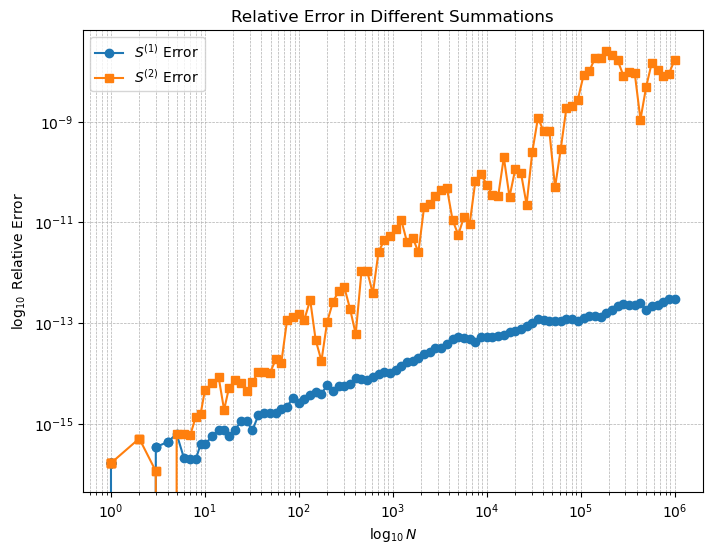

In [7]:
# Create Log-log plot
plt.figure(figsize=(8, 6))
plt.loglog(N_values, errors_S1, label="$S^{(1)}$ Error", marker='o')
plt.loglog(N_values, errors_S2, label="$S^{(2)}$ Error", marker='s')
plt.xlabel("$\log_{10} N$")
plt.ylabel("$\log_{10}$ Relative Error")
plt.legend()
plt.title("Relative Error in Different Summations")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

**(A3)** In spite of the power of your trusty computer, calculating the sum of even a simple series may require some thought and care. Consider the two series

[3.13] $S^{\text{up}} = \sum_{n=1}^{N}\frac{1}{n}$ and $S^{\text{down}} = \sum_{n=N}^{1}\frac{1}{n}$

Both series are finite as long as $N$ is finite, and when summed analytically both give the same answer. Nonetheless, because of round-off error, the numerical value of $S^{\text{up}}$ will not be precisely that of $S^{\text{down}}$.

(a) Write a program to calculate $S^{\text{up}}$ and $S^{\text{down}}$ as functions of $N$.

(b) Make a log-log plot of $(S^{\text{up}} - S^{\text{down}})/(|S^{\text{up}}| + |S^{\text{down}}|)$ *versus* $N$.

(c) Observe the linear regime on your graph and explain why the downward sum is generally more precise.

In [8]:
#Instantiate functions for calculating the two summations, and their relative difference.

def sum_up(N):
    return sum(1/n for n in range(1, N+1))

def sum_down(N):
    return sum(1/n for n in range(N, 0, -1))

def relative_difference(N):
    S_up = sum_up(N)
    S_down = sum_down(N)
    return abs(S_up - S_down) / (abs(S_up) + abs(S_down))

N_values = np.logspace(1, 6, num=100, dtype=int)  # N from 10 to 1,000,000
rel_diff = [relative_difference(N) for N in N_values]


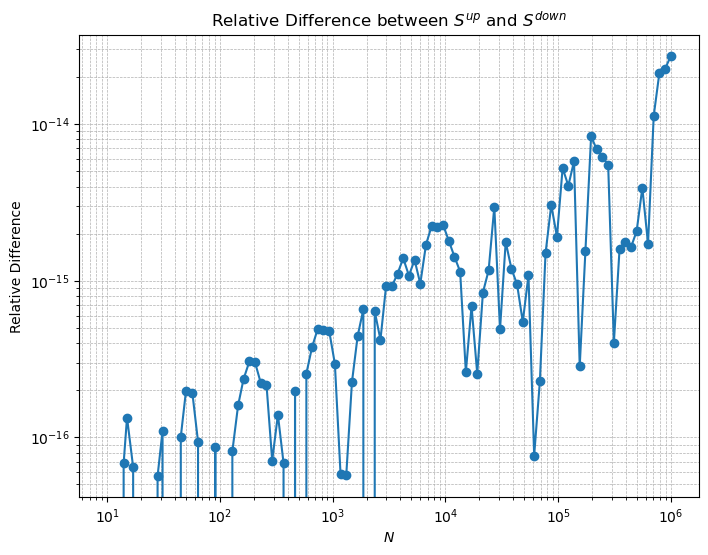

In [9]:
# Plot the Relative Difference
plt.figure(figsize=(8,6))
plt.loglog(N_values, rel_diff, marker='o', linestyle='-')
plt.xlabel('$N$')
plt.ylabel('Relative Difference')
plt.title('Relative Difference between $S^{up}$ and $S^{down}$')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

In general, we expect the downward summation to be more precise. Starting at lower values of $N$ in the denominator will return a relatively larger number (e.g., $1$, $\frac{1}{2}$, $\frac{1}{3}$, ...), which will limit precision of the variable. 

By performing the summation using the higher values of $N$ at the beginning, the precision loss is minimized since we are first adding the smallest terms first, while leaving the largest values at the end.

This is further verified by the trend between the relative error and $N$, which suggests that a compounding error exists in the upward summation as $N$ is increased.

## B. Error in Specular Reflection

(1) Determine the path followed by a light ray for a perfectly reflecting mirror.

(2) Plot the light trajectories for a range of values for the initial angle $\phi$.

(3) Repeat the previous calculation using just four places of precision. You can do this by using the Python command `round`, for instance, `round(1.234567,4) = 1.234`. You should find that a significant relative error accumulates. As in large and complicated calculations with many steps and finite precision, this type of error increases as the number of calculational steps increases.

In [10]:
# Functions

def calculate_trajectory(phi, num_reflections, theta, precision=None):
    """
    Calculate the trajectory of a light ray in a circular mirror.

    Parameters:
        phi (float): Initial angle in radians.
        num_reflections (int): Number of reflections to compute.
        theta (float): Starting angle in radians.
        precision (int, optional): Number of decimal places for rounding. Defaults to None.

    Returns:
        list: List of angles (theta) at each reflection.
    """
    # Starting angle
    trajectory = [theta]

    # Calculate the position of reflection points for each succeeding reflections
    for i in range(num_reflections):
        theta += 2 * phi
        
        #Round if specified for reduced precision
        if precision is not None:
            theta = round(theta, precision) 
        theta %= 2 * np.pi  # Wrap around to stay within [0, 2π)
        trajectory.append(theta)

    return trajectory


def plot_trajectory(phi, num_reflections, theta, precision=None):
    """
    Plot light ray trajectories for a range of initial angles.

    Parameters:
        phi_values (list): List of initial angles (phi) in radians.
        num_reflections (int): Number of reflections to compute.
        precision (int, optional): Number of decimal places for rounding. Defaults to None.
    """
    fig, ax = plt.subplots(figsize=(8, 8))

    circle = plt.Circle((0, 0), 1, color='black', fill=False)
    ax.add_artist(circle)

    trajectory = calculate_trajectory(phi, num_reflections, theta, precision)
    x = np.cos(trajectory)
    y = np.sin(trajectory)
    ax.plot(x, y)

    ax.set_xlim([-1.1, 1.1])
    ax.set_ylim([-1.1, 1.1])
    ax.set_aspect('equal', adjustable='datalim')
    plt.title("Trajectories of light rays reflecting in a circular mirror")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.show()

In [11]:
# Parameters
phi = np.pi/2.2  # Initial angles
num_reflections = 100  # Number of reflections
theta_init = 0 # Starting position
precision_val = 2 # Precision for reduced precision plot

### High Precision Plot

The parameters were set to $\theta = 0$ *(starting point at (1,0) on the unit circle)* and $\phi = \frac{\pi}{{}}$ *(angle of reflection with respect to the normal)*. The corresponding high-precision plot is shown below.

According to [3.40]: $\frac{\phi}{\pi} = \frac{n}{m}$

If $\phi/\pi$ is a rational number, the light ray will fall upon itself (back on its starting point) to form a geometric figure. This can be seen in the high-precision plot, where the trajectory traces on itself after several reflections.

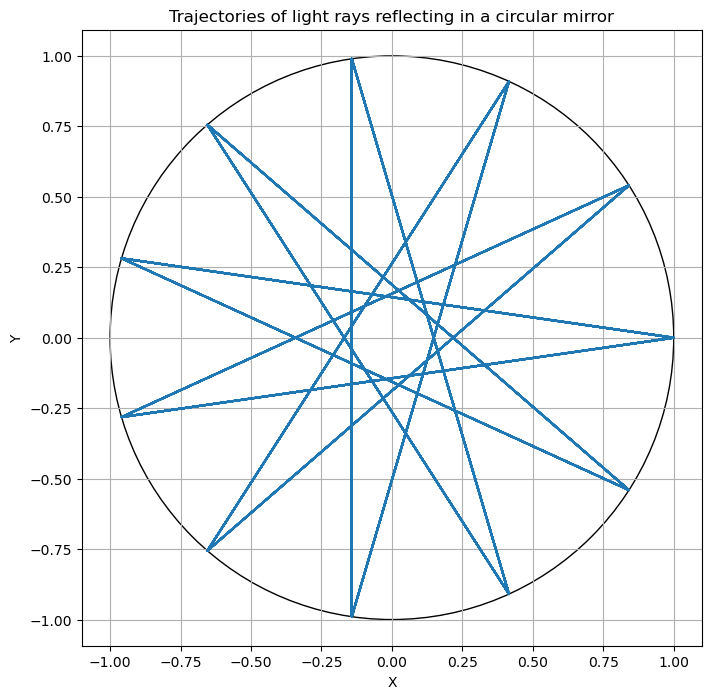

In [12]:
# High precision plot
plot_trajectory(phi, num_reflections, theta_init) # Precision defaults to None

### Low Precision Plot
However, when using the same functions (*calculate_trajectory* and *plot_trajectory*) with a reduced precision (in this case down to two decimal points), the reflection will be slightly shifted away from the starting point. The compounding error leads to the formation of infinite internal reflections within the circular mirror.

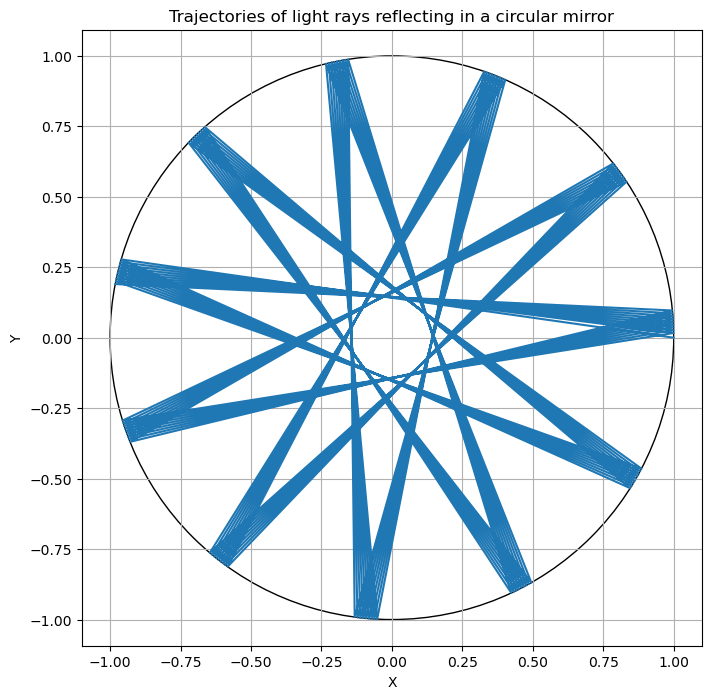

In [13]:
# Reduced precision plot
plot_trajectory(phi, num_reflections, theta_init, precision=precision_val)